# Y.Afisha.

Me han ofrecido hacer prácticas en el departamento analítico de Y.Afisha. 
Mi primera tarea es ayudar a optimizar los gastos de marketing.

Lo que tengo:
	
    Registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018;
    Archivo de volcado con todos los pedidos del período;
    Estadísticas de gastos de marketing.

Lo que voy a investigar:
	
    Cómo la gente usa el producto;
    Cuándo empiezan a comprar;
    Cuánto dinero trae cada cliente;
    Cuándo pagan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Descargamos los datos y los preparamos para el análisis
Almacena los datos de visitas, pedidos y gastos en variables. Optimiza los datos para el análisis. Asegúrate de que cada columna contenga el tipo de datos correcto.

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

### Visits

In [3]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [5]:
visits['Device'] = visits['Device'].astype('category')
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits.rename(columns={'Device':'device',
                          'End Ts':'end_ts',
                          'Source Id': 'source_id',
                          'Start Ts':'start_ts',
                          'Uid':'uid'}, 
                 inplace=True)
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [6]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


### Orders

In [7]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [8]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [9]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
orders.rename(columns={'Buy Ts':'buy_ts',
                          'Revenue':'revenue',
                          'Uid':'uid'}, 
                 inplace=True)
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [10]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


### Costs

In [11]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [12]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [13]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [14]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


### Conclusion
Se optimizo el uso de memoria convirtiendo el tipo de datos objeto en tipos categoría y timefarme. 
También he cambiado el nombre de las columnas, unificando todos los nombres.

## Informes y calcula métricas

### Producto:
¿Cuántas personas lo usan cada día, semana y mes?

¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).

¿Cuál es la duración de cada sesión?

¿Con qué frecuencia los usuarios y las usuarias regresan?


#### ¿Cuántas personas lo usan cada día, semana y mes?

##### Creamos columnas separadas para los valores de dia, semana, mes y año.

In [15]:
visits['session_date'] = visits['start_ts'].dt.date
visits['session_week']  = visits['start_ts'].dt.week
visits['session_month'] = visits['start_ts'].dt.month
visits['session_year']  = visits['start_ts'].dt.year

/tmp/ipykernel_580/2534460704.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  visits['session_week']  = visits['start_ts'].dt.week


##### Cálculo de métricas agrupando los datos por dia, semana y mes de sesion.

In [16]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

In [17]:
print('Usuarios por dia:', int(dau_total))
print('Usuarios por semana:', int(wau_total))
print('Usuarios por mes:', int(mau_total))

Usuarios por dia: 907
Usuarios por semana: 5716
Usuarios por mes: 23228


##### Conclusión: 

Usuarios por dia: 907

Usuarios por semana: 5716

Usuarios por mes: 23228

#### ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).

In [18]:
sessions_per_user = visits.groupby(['session_date']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user

,n_sessions,n_users,sessions_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


In [19]:
sessions_per_user.describe()

,n_sessions,n_users,sessions_per_user
count,364.000000,364.000000,364.000000
mean,987.362637,907.991758,1.082170
std,418.994796,370.513838,0.020876
min,1.000000,1.000000,1.000000
25%,635.500000,594.000000,1.070321
50%,1003.000000,921.000000,1.082488
75%,1280.000000,1173.000000,1.093876
max,4042.000000,3319.000000,1.217837


##### Conclusión: 

Hay una media de 1.082170 sesión por usuario.

#### ¿Cuál es la duración de cada sesión?

In [20]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits.head()

,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month,session_year,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017,0


<AxesSubplot:>

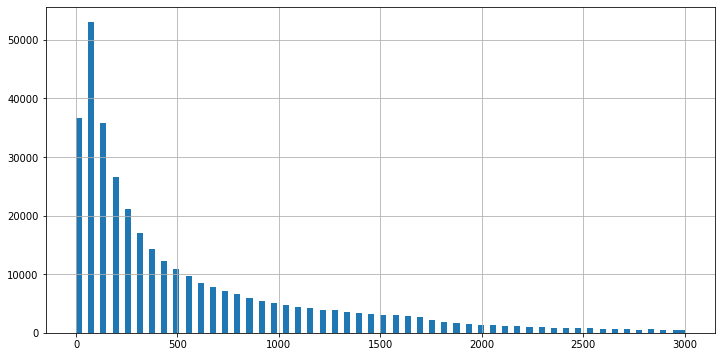

In [21]:
visits['session_duration'].hist(bins=100, range =(0,3000), figsize=(12, 6))

In [22]:
visits['session_duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration, dtype: float64

In [23]:
visits['session_duration'].mode()

0    60
dtype: int64

##### Conclusión: 

Duración media de la sesión 643 segundos

Valor que mas aparece es de 60 segundos con un registro de mayor de 50,000. 

#### ¿Con qué frecuencia los usuarios y las usuarias regresan?

Tomaremos la fecha en que el usuario estuvo activo por primera vez en la aplicación.

In [24]:
first_visit = visits.groupby('uid')['start_ts'].min()
first_visit.name = 'first_visit'
visits = visits.join(first_visit ,on='uid')
visits.head()

,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month,session_year,session_duration,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,1440,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017,0,2017-12-27 14:06:00


Formar cohortes por mes de compra

In [25]:
visits['first_visit_m'] = visits['first_visit'].astype('datetime64[M]')
visits['visit_m'] = visits['start_ts'].astype('datetime64[M]')

Creamos una tabla dinámica para saber cuántas personas siguen en los meses siguientes al mes de la primera visita.

In [26]:
pivot_visit_m = visits.pivot_table(index='first_visit_m', columns='visit_m', values='uid', aggfunc='nunique',fill_value='')
pivot_visit_m

visit_m,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_visit_m,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0
2017-08-01,,,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0
2017-09-01,,,,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0
2017-10-01,,,,,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0
2017-11-01,,,,,,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0
2017-12-01,,,,,,,25268.0,1410.0,960.0,786.0,512.0,481.0
2018-01-01,,,,,,,,22624.0,1351.0,890.0,565.0,458.0
2018-02-01,,,,,,,,,22197.0,1267.0,565.0,446.0


##### Conclusión: 

El porcentaje de usarios que regresa es menor al 9% en el sigueinte mes y menor al  6% en el semestre.

### Ventas:

¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).

¿Cuántos pedidos hacen durante un período de tiempo dado?

¿Cuál es el tamaño promedio de compra?

¿Cuánto dinero traen? (LTV)


####  ¿Cuándo la gente empieza a comprar? 

(En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).

Para cada usuario, encontraremos la fecha del primer pedido

In [27]:
first_order = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
first_order.columns= ['uid','first_order']
first_order.head()

,uid,first_order
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


Para cada usuario, encontraremos la fecha de la primera sesión

In [28]:
first_session = visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_session.columns= ['uid','first_session']
first_session.head()

,uid,first_session
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [29]:
conversion = pd.merge(first_session, first_order, on='uid')
conversion['conversion_time'] = conversion['first_order'] - conversion['first_session']
conversion.head()

,uid,first_session,first_order,conversion_time
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106 days 23:02:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0 days 00:00:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0 days 01:19:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0 days 19:44:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0 days 00:00:00


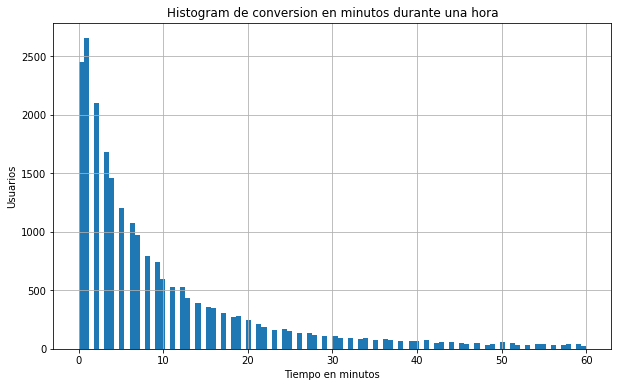

In [30]:
conversion['conversion_time_minutes'] = conversion['conversion_time'].dt.total_seconds() / 60
plt.figure(figsize=(10, 6))
plt.hist(conversion['conversion_time_minutes'], bins=100, range=(0,60))
plt.xlabel('Tiempo en minutos')
plt.ylabel('Usuarios')
plt.title('Histogram de conversion en minutos durante una hora')
plt.grid(True)
plt.show()

In [31]:
conversion['conversion_time_minutes'].describe()

count     36523.000000
mean      24340.175834
std       67784.774690
min           0.000000
25%           4.000000
50%          16.000000
75%        2897.000000
max      523144.000000
Name: conversion_time_minutes, dtype: float64

In [32]:
conversion['conversion_time_minutes'].mode()

0    1.0
dtype: float64

##### Conclusión: 

La mayoría de los usuarios compra en la primera hora, mayormente en los primeros 4 minutos.

#### ¿Cuántos pedidos hacen durante un período de tiempo dado?

Vamos a realizar un df que nos muestre la cantidad de pedidos realizados por cada mes de cada año y tambien el promedio de comprar por usuario.


In [33]:
orders['orders_year'] = orders['buy_ts'].dt.year
orders['orders_month'] = orders['buy_ts'].dt.month
orders_per_user = orders.groupby(['orders_year','orders_month']).agg({'uid':['count', 'nunique']}).reset_index()
orders_per_user.columns = ['orders_year','orders_month','n_orders', 'n_users']
orders_per_user['orders_per_user'] = orders_per_user['n_orders'] / orders_per_user['n_users']
orders_per_user.head()

,orders_year,orders_month,n_orders,n_users,orders_per_user
0,2017,6,2354,2023,1.163618
1,2017,7,2363,1984,1.191028
2,2017,8,1807,1472,1.227582
3,2017,9,3387,2750,1.231636
4,2017,10,5679,4675,1.214759


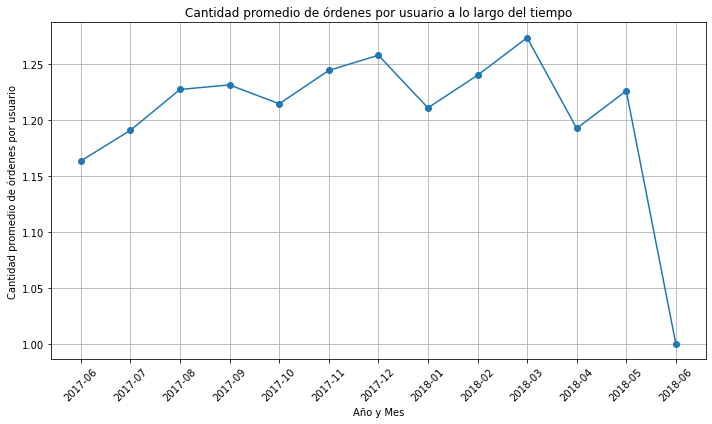

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(orders_per_user['orders_year'].astype(str) + '-' + orders_per_user['orders_month'].astype(str).str.zfill(2), orders_per_user['orders_per_user'], marker='o')
plt.xlabel('Año y Mes')
plt.ylabel('Cantidad promedio de órdenes por usuario')
plt.title('Cantidad promedio de órdenes por usuario a lo largo del tiempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### Conclusion:
Los usuarios no superan 1.5 de ordenes por usuario

#### ¿Cuál es el tamaño promedio de compra?


Se agrupa el df orders por las columnas 'first_order_month' y 'order_month'. Luego, se agrega la suma de los ingresos ('revenue') y se cuenta el número de usuarios ('nunique') para cada cohorte.

Se crea una nueva columna 'revenue_per_user' que calcula el ingreso promedio por usuario para cada cohorte, dividiendo los ingresos totales entre el número de usuarios.

In [35]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
first_order_day = orders.groupby('uid')['buy_ts'].min()
first_order_day.name = 'first_order_day'
orders = orders.join(first_order_day, on='uid')
orders['first_order_month'] = orders['first_order_day'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum', 'uid':'nunique'}).reset_index()
orders_grouped_by_cohorts.columns = ['first_order_month','order_month','revenue', 'n_users']
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['n_users']
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue_per_user'].round()
orders_grouped_by_cohorts

,first_order_month,order_month,revenue,n_users,revenue_per_user
0,2017-06-01,2017-06-01,9557.49,2023,5.0
1,2017-06-01,2017-07-01,981.82,61,16.0
2,2017-06-01,2017-08-01,885.34,50,18.0
3,2017-06-01,2017-09-01,1931.30,54,36.0
4,2017-06-01,2017-10-01,2068.58,88,24.0
...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,58,19.0
75,2018-04-01,2018-04-01,10600.69,2276,5.0
76,2018-04-01,2018-05-01,1209.92,69,18.0
77,2018-05-01,2018-05-01,13925.76,2988,5.0


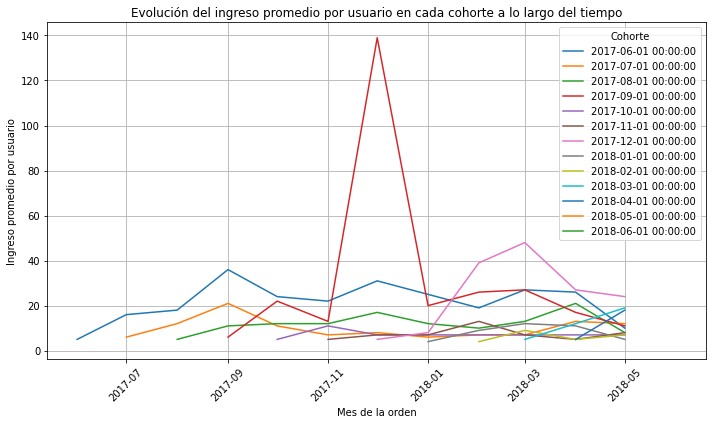

In [36]:
plt.figure(figsize=(10, 6))
for cohort, group in orders_grouped_by_cohorts.groupby('first_order_month'):
    plt.plot(group['order_month'], group['revenue_per_user'], label=str(cohort))
plt.xlabel('Mes de la orden')
plt.ylabel('Ingreso promedio por usuario')
plt.title('Evolución del ingreso promedio por usuario en cada cohorte a lo largo del tiempo')
plt.legend(title='Cohorte')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
orders_grouped_by_cohorts['revenue_per_user'].describe()

count     79.000000
mean      14.746835
std       16.779466
min        3.000000
25%        7.000000
50%       11.000000
75%       18.500000
max      139.000000
Name: revenue_per_user, dtype: float64

##### Conclusion:

El tamaño promedio de compra es de 14.7468, tambien se puede ver que para el cohorte del 09-2017 se incremnto exponencialmente 

#### ¿Cuánto dinero traen? (LTV)

Vamos a encontrar el mes de la primera compra de cada cliente:

In [38]:
costs['month'] = costs['dt'].astype('datetime64[M]') 
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

Calcularemos el número de nuevos clientes (n_buyers) de cada mes:

In [39]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

Ahora agruparemos la tabla de pedidos por mes de primera compra y mes de compra y sumaremos los ingresos.

In [40]:
cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
ltv = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [41]:
margin_rate = .5

ltv['gp'] = ltv['revenue'] * margin_rate
ltv['lifetime'] = (ltv['order_month'] - ltv['first_order_month']) / np.timedelta64(1, 'M')
ltv['lifetime'] = ltv['lifetime'].round().astype('int')

Dividamos el beneficio bruto de la cohorte de cada mes por el número total de usuarios de cada cohorte. Visualizaré las cohortes como una tabla dinámica para que las cosas queden claras.

In [42]:
ltv['ltv'] = ltv['gp'] / ltv['n_buyers']

ltv_pivot = ltv.pivot_table(index='first_order_month', columns='lifetime', values='ltv', aggfunc='mean').round(2)
ltv_pivot.fillna('')

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.36,0.24,0.22,0.48,0.51,0.37,0.48,0.29,0.28,0.3,0.29,0.13
2017-07-01,3.01,0.17,0.31,0.18,0.09,0.08,0.06,0.07,0.08,0.07,0.08,
2017-08-01,2.64,0.24,0.23,0.2,0.25,0.14,0.11,0.2,0.15,0.09,,
2017-09-01,2.82,0.56,0.26,1.99,0.2,0.32,0.35,0.12,0.09,,,
2017-10-01,2.50,0.27,0.1,0.08,0.08,0.06,0.04,0.06,,,,
2017-11-01,2.58,0.2,0.1,0.16,0.07,0.03,0.06,,,,,
2017-12-01,2.37,0.13,0.46,0.53,0.16,0.17,,,,,,
2018-01-01,2.07,0.15,0.15,0.07,0.03,,,,,,,
2018-02-01,2.08,0.14,0.04,0.04,,,,,,,,


##### Conclusion:
    
Aqui podemos ver lo que ingresa cada cliente en su 'lifetime', esta mas cargado a su primera compra unicamente.

### Marketing:
	¿Cuánto dinero se gastó? (Total/por fuente/a lo largo del tiempo)
	¿Cuánto costó la adquisición de clientes de cada una de las fuentes?
	¿Cuán rentables eran las inversiones? (ROI)
	 
Traza gráficos para mostrar cómo difieren estas métricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo. 


#### ¿Cuánto dinero se gastó? (Total/por fuente/a lo largo del tiempo)

Agruparé los costos por dt y lo visualizaré.

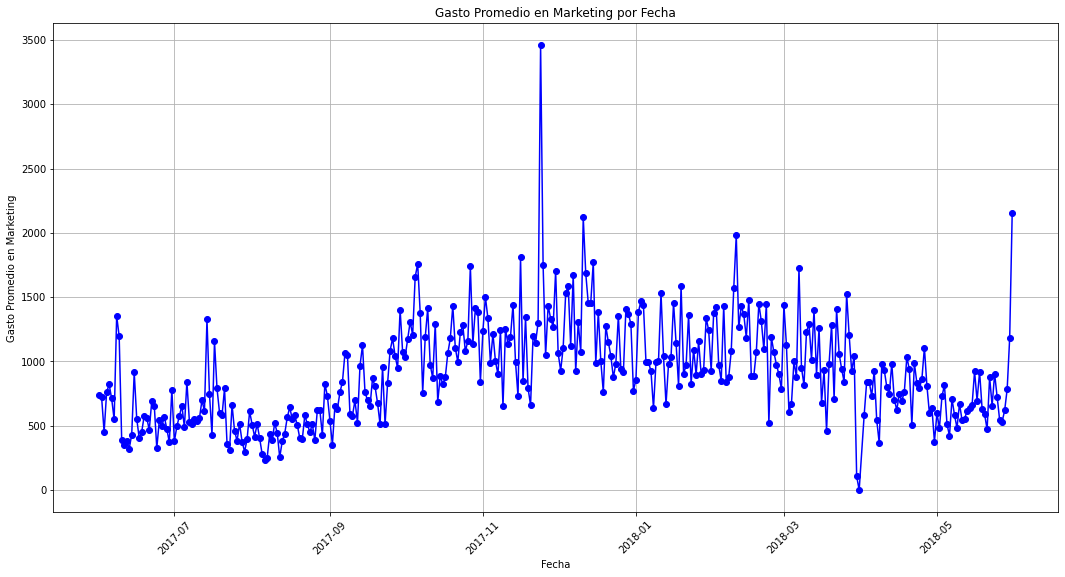

In [43]:
spent_mkt = costs.groupby('dt').agg({'costs': 'sum'}).reset_index()
spent_mkt.columns = ['date', 'average_costs']

plt.figure(figsize=(18, 9))
plt.plot(spent_mkt['date'], spent_mkt['average_costs'], marker='o', linestyle='-', color='b')
plt.title('Gasto Promedio en Marketing por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Gasto Promedio en Marketing')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [44]:
spent_mkt['average_costs'].describe()

count     364.000000
mean      904.207747
std       396.956825
min         0.700000
25%       595.682500
50%       873.655000
75%      1155.605000
max      3458.860000
Name: average_costs, dtype: float64

##### Conclusion:

En dicembre del 2017 el gasto llego a: 3,458.86, pero si se ha mentido un promedio de : 904.20. Con otro incremento en Junio de mas de 2,000

#### ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?

Para calcular el CAC (Costo de Adquisición de Cliente), se debe dividir el gasto total en marketing entre el número total de usuarios:

In [45]:
cac = spent_mkt['average_costs'].sum() / orders_per_user['n_users'].sum()
print(cac)

8.02388210341549


##### Conclusion:
Esto toma la suma total de los gastos promedio en marketing y la divide entre la cantidad total de usuarios para obtener el costo de adquisición promedio por cliente.

#### ¿Cuán rentables eran las inversiones? (ROI)

En primer lugar, hallaremos los gastos totales de cada mes y, a continuación, los dividiremos por el número de clientes de cada cohorte.

In [46]:
monthly_costs = costs.groupby('month').sum()
monthly_costs.head() 

,source_id,costs
month,,
2017-06-01,1020,18015.00
2017-07-01,1054,18240.59
2017-08-01,1054,14790.54
2017-09-01,1020,24368.91
2017-10-01,1054,36322.88


In [47]:
ltv.head()

,first_order_month,n_buyers,order_month,revenue,gp,lifetime,ltv
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265


In [48]:
report = pd.merge(ltv, monthly_costs, left_on='first_order_month', right_on='month')
report['cac'] = report['costs'] / report['n_buyers']
report.head()

,first_order_month,n_buyers,order_month,revenue,gp,lifetime,ltv,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1020,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,1020,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819,1020,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336,1020,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265,1020,18015.0,8.905091


Calculemos el ROMI (retorno de la inversión en marketing) dividiendo el LTV por el CAC.

In [49]:
report['romi'] = report['ltv'] / report['cac']
romi_pivot = report.pivot_table(index='first_order_month', columns='lifetime', values='romi', aggfunc='mean')
romi_pivot.cumsum(axis=1).round(2)
romi_pivot.fillna('')

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.265265,0.02725,0.024572,0.053603,0.057413,0.041297,0.053365,0.032655,0.031062,0.034014,0.032075,0.014422
2017-07-01,0.316811,0.01767,0.032868,0.018922,0.009319,0.008226,0.006336,0.007476,0.008499,0.007756,0.008206,
2017-08-01,0.244373,0.02186,0.021234,0.018121,0.022881,0.013132,0.009757,0.018757,0.013533,0.008706,,
2017-09-01,0.298916,0.059184,0.027587,0.210545,0.021212,0.034267,0.037155,0.012876,0.009744,,,
2017-10-01,0.298933,0.032008,0.011434,0.009388,0.009054,0.007191,0.005067,0.006898,,,,
2017-11-01,0.277466,0.02149,0.010742,0.017491,0.007967,0.0029,0.006186,,,,,
2017-12-01,0.271007,0.014892,0.052912,0.06093,0.017898,0.019335,,,,,,
2018-01-01,0.208086,0.014831,0.01531,0.007184,0.003155,,,,,,,
2018-02-01,0.231903,0.015524,0.00438,0.004136,,,,,,,,


In [51]:
romi = report['ltv'].sum() / report['cac'].sum()
romi*100

6.011500571909709

#### Conclusión: 
El equipo de marketing gasta más dinero en adquisición del que obtiene en ingresos totales. Es necesario remodelar la estrategia de costes y adquisición.

por cada dolar gastado en marketing, se obtuvo un retorno de aproximadamente 6.01 unidades monetarias.

## Conclusión final: Aconsejamos a los expertos de marketing cuánto dinero invertir y dónde



Los usuarios prefieren utilizar Yandex.Afisha a través del escritorio más que a través de la aplicación.

Un usuario tiene 1 sesión al día y la mayoría de ellas dura 60 segundos. Recomendaría al equipo de marketing que revise el recorrido del usuario en el sitio y ver si el usuario tiene algún problema para interactuar con el producto, si hay alguna apartado de la app en la que se frustra y abandona.

La mayoría de los usuarios deciden comprar el primer día después de registrarse. Demuestra que el proceso de incorporación es sencillo y que podemos esperar conversiones de clientes potenciales el primer día. Pero en el lifetime de usuario la compra baja muchisimo. El porcentaje de usarios que regresa es menor al 9% en el sigueinte mes y menor al 6% en el semestre.

El CAC es mayor al LTV durante todos los meses, el presupuesto de marketing se está utilizando de forma incorrecta. 